# Import Basic packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# Load Data-Set

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
Y =boston_dataset.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#  2D Visualization using PCA 

In [4]:
names = boston_dataset["feature_names"]
print("Column Names in Data : ",names)
print("the shape of sample data = ",X.shape)

Column Names in Data :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
the shape of sample data =  (506, 13)


In [5]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)


(506, 13)


In [6]:
#find the co-variance matrix which is : X^T * X
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (13, 13)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(11,12))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (13, 2)
Updated shape of eigen vectors =  (2, 13)


In [8]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)

print (" Rsultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)



 Rsultanat new data points' shape  (2, 13) X (13, 506)  =  (2, 506)


In [9]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, Y)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print("*"*80)
print(dataframe.head(10))

********************************************************************************
   1st_principal  2nd_principal  label
0      -0.773113      -2.098297   24.0
1      -0.591985      -1.457252   21.6
2      -0.599639      -2.074598   34.7
3       0.006871      -2.611504   33.4
4      -0.097712      -2.458185   36.2
5       0.009487      -2.214852   28.7
6      -0.349872      -1.358881   22.9
7      -0.577800      -0.842045   27.1
8      -0.342518      -0.179928   16.5
9      -0.316201      -1.074184   18.9


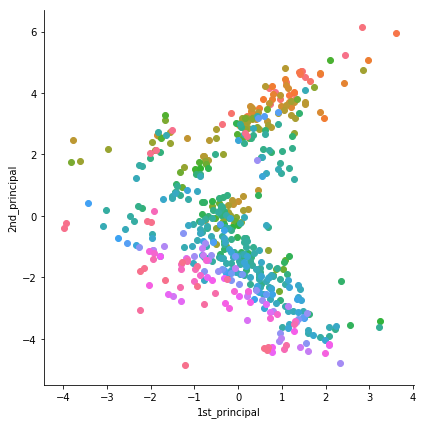

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

# PCA using Scikit-Learn

In [11]:
# initializing the pca
from sklearn.decomposition import PCA

# configuring the parameteres
# the number of components = 2
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(X)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca.shape)

shape of pca_reduced.shape =  (506, 2)


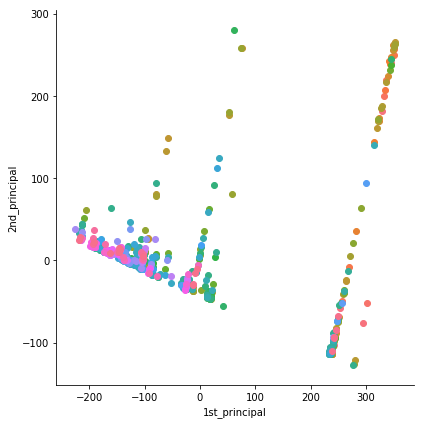

In [13]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca.T, Y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

# PCA for dimensionality redcution (not for visualization)

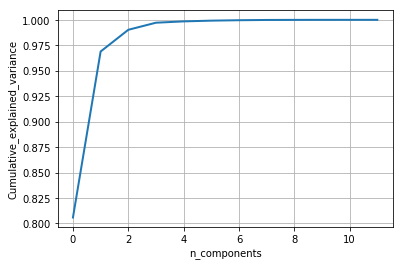

In [14]:
# PCA for dimensionality redcution (non-visualization)

pcamodel = PCA(n_components=12)
pca = pcamodel.fit_transform(X)

percentage_var_explained = pcamodel.explained_variance_ / np.sum(pcamodel.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.